In [1]:
import matplotlib.pyplot as plt
import matplotlib
import random, math
import numpy as np
import scipy, scipy.stats
import pandas as pd



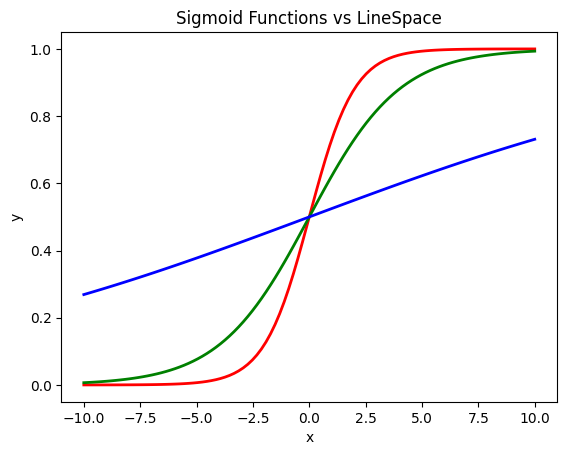

In [2]:
x = np.linspace(-10, 10,100)
y1 = 1.0 / (1.0 + np.exp(-x))
y2 = 1.0 / (1.0 + np.exp(-x/2))
y3 = 1.0 / (1.0 + np.exp(-x/10))

plt.title("Sigmoid Functions vs LineSpace")
plt.plot(x,y1,'r-', lw=2)
plt.plot(x,y2,'g-', lw=2)
plt.plot(x,y3,'b-', lw=2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Kaggle Titanic

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
import pandas as pd



In [9]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')
train[train.columns[[2,4,5,1]]].head()

,Pclass,Sex,Age,Survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0


In [10]:
data = train[['Sex', 'Age', 'Pclass', 'Survived']].copy()
data['Sex'] = data['Sex'] == 'female'
data = data.dropna()

In [11]:
data_np = data.astype(np.int32).values
X = data_np[:,:-1]
y = data_np[:,-1]
female = X[:,0] == 1
survived = y == 1
# This vector contains the age of the passengers.
age = X[:,1]
# We compute a few histograms.
bins_ = np.arange(0, 121, 5)
S = {'male': np.histogram(age[survived & ~female],
bins=bins_)[0],
'female': np.histogram(age[survived & female],
bins=bins_)[0]}
D = {'male': np.histogram(age[~survived & ~female],
bins=bins_)[0],
'female': np.histogram(age[~survived & female],
bins=bins_)[0]}
bins = bins_[:-1]
plt.figure(figsize=(15,8))

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

AttributeError: 'function' object has no attribute 'train_test_split'

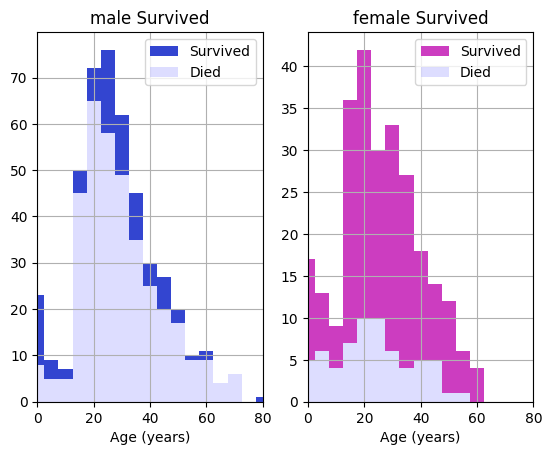

In [15]:
for i, sex, color in zip((0, 1),('male', 'female'), ('#3345d0','#cc3dc0')):
    plt.subplot(121 + i)
    plt.bar(bins, S[sex], bottom=D[sex], color=color,width=5, label='Survived')
    plt.bar(bins, D[sex], color='#aaaaff', width=5, label='Died',alpha=0.4)
    plt.xlim(0, 80)
    plt.grid(None)
    plt.title(sex + " Survived")
    plt.xlabel("Age (years)")
    plt.legend()
(X_train, X_test, y_train, y_test) = train_test_split.train_test_split(X, y, test_size=.05)
print(X_train, y_train)
# Logistic Regression from linear_model
logreg = lm.LogisticRegression();
logreg.fit(X_train, y_train)
y_predicted = logreg.predict(X_test)
plt.figure(figsize=(15,8));
plt.imshow(np.vstack((y_test, y_predicted)),
interpolation='none', cmap='bone');
plt.xticks([]); plt.yticks([]);
plt.title(("Actual and predicted survival outcomes on the test set"))                                                        
                                                    